# Topic Analysis - Country

##### Grace Chen

## Load Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
label_data = pd.read_csv("preliminary_data/GNI88.csv")
label_data.head()

,artdate,Article ID,Headline,Quote ID,Article Status,Article Position,Messages,Submessages,Quote Position,Legacy Quote Tag,...,Source Religion,Legacy Source Tag,Constituent Group,Media Name,Media Medium,Journalist Name,Constituent Author,Article Issues,Custom Group,Media Group
0,2018-01-10,3759306,North Korea makes deals and threats,7023849,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Neutral,NaN,...,Unknown,Unknown,None (Legacy Other),Washington Post,NaN,"Fifield, Anna",NaN,NaN,NaN,NaN
1,2018-01-10,3759306,North Korea makes deals and threats,7023842,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Negative,NaN,...,Unknown,Unknown,None (Legacy Other),Washington Post,NaN,"Fifield, Anna",NaN,NaN,NaN,NaN
2,2018-01-10,3759306,North Korea makes deals and threats,7023839,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Negative,NaN,...,Unknown,Unknown,None (Legacy Other),Washington Post,NaN,"Fifield, Anna",NaN,NaN,NaN,NaN
3,2018-01-10,3759306,North Korea makes deals and threats,7023833,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Negative,NaN,...,Unknown,Unknown,None (Legacy Other),Washington Post,NaN,"Fifield, Anna",NaN,NaN,NaN,NaN
4,2018-01-10,3759306,North Korea makes deals and threats,7023846,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Positive,NaN,...,Unknown,Unknown,None (Legacy Other),Washington Post,NaN,"Fifield, Anna",NaN,NaN,NaN,NaN


In [6]:
article_data = pd.read_json("preliminary_data/gni88.json", lines=True)
article_data.head()

,Article ID,Headline,Content,Media Name,Author,Published Date
0,3777409,Modernized Tu-160 to boost Russia's long-range...,Modernized Tu-160 to boost Russia's long-range...,Defense News,"Bodner, Matthew",2018-02-15 00:00:00+00
1,3764250,Give Trump more nuclear weapons and more ways ...,Give Trump more nuclear weapons and more ways ...,CNN,"Collina, Tom Z.",2018-02-02 00:00:00+00
2,3764251,Trump wants to build smaller atomic weapons; R...,Trump wants to build smaller atomic weapons; R...,Los Angeles Times,"Cloud, David",2018-02-03 00:00:00+00
3,3764252,Egypt and Israel Secretly Allied In Sinai Battle,Egypt and Israel Secretly Allied In Sinai Batt...,The New York Times,"Kirkpatrick, David D.",2018-02-04 00:00:00+00
4,3764253,Listen: Top Armed Services Dem worried about r...,Listen: Top Armed Services Dem worried about r...,The Hill,"Simendinger, Alexis",2018-02-03 00:00:00+00


## Choosing columns

In [27]:
topic_data = label_data[['Article ID', 'Headline', 'Quote ID','Messages', 'Submessages', 'QText']]
topic_data.head()

,Article ID,Headline,Quote ID,Messages,Submessages,QText
0,3759306,North Korea makes deals and threats,7023849,OLD Proliferation,OLD State Level Nuclear Programs,the nuclear issue was separate and that Pyongy...
1,3759306,North Korea makes deals and threats,7023842,OLD Proliferation,OLD State Level Nuclear Programs,"the country's ""cutting-edge"" nuclear weapons a..."
2,3759306,North Korea makes deals and threats,7023839,OLD Proliferation,OLD State Level Nuclear Programs,That was not on the table
3,3759306,North Korea makes deals and threats,7023833,OLD Proliferation,OLD State Level Nuclear Programs,"All our cutting-edge weapons, including our hy..."
4,3759306,North Korea makes deals and threats,7023846,OLD Proliferation,OLD State Level Nuclear Programs,"despite the quibbles, Tuesday's discussions we..."


In [28]:
def is_country(msg):
    countries = ["China", "India", "Iran", "Israel", "North Korea", "OLD Iran", "Pakistan", "Russia", "Turkey", "KSA"]
    return msg in countries

is_countries = topic_data["Messages"].apply(is_country)

In [29]:
country_data = topic_data[is_countries == True]
country_data.head()

,Article ID,Headline,Quote ID,Messages,Submessages,QText
3853,5157643,"A year after nuclear deal, taking stock of a...",8910511,OLD Iran,OLD Negotiations,The benefits mean Iranians were spared an econ...
3854,5157643,"A year after nuclear deal, taking stock of a...",8910526,OLD Iran,OLD Negotiations,"the U.S. has ""no indication"" those efforts suc..."
3855,5157643,"A year after nuclear deal, taking stock of a...",8910521,OLD Iran,OLD Sanctions,Banks and businesses that use the U.S. financi...
3856,5157643,"A year after nuclear deal, taking stock of a...",8910520,OLD Iran,OLD Negotiations,the deal made the world safer
3859,5157643,"A year after nuclear deal, taking stock of a...",8910524,OLD Iran,OLD Negotiations,Iran's economy grew by 0.7% since the deal was...


In [30]:
country_data["Messages"] = country_data["Messages"].str.replace("OLD Iran", "Iran")
country_data.head()

/var/folders/x1/86vmscps1y511ryptj4pmd1w0000gn/T/ipykernel_87012/3715493483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data["Messages"] = country_data["Messages"].str.replace("OLD Iran", "Iran")


,Article ID,Headline,Quote ID,Messages,Submessages,QText
3853,5157643,"A year after nuclear deal, taking stock of a...",8910511,Iran,OLD Negotiations,The benefits mean Iranians were spared an econ...
3854,5157643,"A year after nuclear deal, taking stock of a...",8910526,Iran,OLD Negotiations,"the U.S. has ""no indication"" those efforts suc..."
3855,5157643,"A year after nuclear deal, taking stock of a...",8910521,Iran,OLD Sanctions,Banks and businesses that use the U.S. financi...
3856,5157643,"A year after nuclear deal, taking stock of a...",8910520,Iran,OLD Negotiations,the deal made the world safer
3859,5157643,"A year after nuclear deal, taking stock of a...",8910524,Iran,OLD Negotiations,Iran's economy grew by 0.7% since the deal was...


In [31]:
article_data = article_data[["Article ID", "Headline", "Content"]]

In [32]:
article_data.head()

,Article ID,Headline,Content
0,3777409,Modernized Tu-160 to boost Russia's long-range...,Modernized Tu-160 to boost Russia's long-range...
1,3764250,Give Trump more nuclear weapons and more ways ...,Give Trump more nuclear weapons and more ways ...
2,3764251,Trump wants to build smaller atomic weapons; R...,Trump wants to build smaller atomic weapons; R...
3,3764252,Egypt and Israel Secretly Allied In Sinai Battle,Egypt and Israel Secretly Allied In Sinai Batt...
4,3764253,Listen: Top Armed Services Dem worried about r...,Listen: Top Armed Services Dem worried about r...


# Combine Dataframes 

In [34]:
merged_df = pd.merge(country_data, article_data, how="inner", on="Article ID")
merged_df.head()

,Article ID,Headline_x,Quote ID,Messages,Submessages,QText,Headline_y,Content
0,5157643,"A year after nuclear deal, taking stock of a...",8910511,Iran,OLD Negotiations,The benefits mean Iranians were spared an econ...,"A year after nuclear deal, taking stock of a...","Valley & State\r\nA year after nuclear deal,..."
1,5157643,"A year after nuclear deal, taking stock of a...",8910526,Iran,OLD Negotiations,"the U.S. has ""no indication"" those efforts suc...","A year after nuclear deal, taking stock of a...","Valley & State\r\nA year after nuclear deal,..."
2,5157643,"A year after nuclear deal, taking stock of a...",8910521,Iran,OLD Sanctions,Banks and businesses that use the U.S. financi...,"A year after nuclear deal, taking stock of a...","Valley & State\r\nA year after nuclear deal,..."
3,5157643,"A year after nuclear deal, taking stock of a...",8910520,Iran,OLD Negotiations,the deal made the world safer,"A year after nuclear deal, taking stock of a...","Valley & State\r\nA year after nuclear deal,..."
4,5157643,"A year after nuclear deal, taking stock of a...",8910524,Iran,OLD Negotiations,Iran's economy grew by 0.7% since the deal was...,"A year after nuclear deal, taking stock of a...","Valley & State\r\nA year after nuclear deal,..."


### Does the same article have the same messages labeled? How much does the message labeling depend on the quote texts compared to articles?

In [45]:
article_message = merged_df[["Article ID", "Messages"]].groupby(["Article ID"]).agg(set)
article_message.head()

,Messages
Article ID,
3810157,{Iran}
3841422,{Iran}
3841424,{Iran}
3841427,{Iran}
3857055,{Iran}


In [50]:
# def has_one_message_only(s):
#     return len(s) == 1

article_message["count"] = article_message["Messages"].apply(len)
article_message.head()

,Messages,count
Article ID,,
3810157,{Iran},1
3841422,{Iran},1
3841424,{Iran},1
3841427,{Iran},1
3857055,{Iran},1


In [53]:
article_message = article_message.reset_index()
article_message_count = article_message[["Article ID", "count"]].groupby("count").count()
article_message_count

,Article ID
count,
1,29095
2,139
3,4
4,3


### Conclusion: Most of the articles have one messages, however, some have 2 messages and a few has more messages. 

## Headline Analysis

In [96]:
def has_country_in_headline(headline, country):
    return country in headline

In [97]:
# test
print(has_country_in_headline(merged_df["Content"][0], "Iran"))

True


In [103]:
headline_message_df = merged_df[["Article ID", "Messages", "Headline_y"]].groupby("Article ID").agg(max)
headline_message_df

,Messages,Headline_y
Article ID,,
3810157,Iran,Great opportunity or trap? 12 experts weigh in...
3841422,Iran,Back Channels: Why Bolton has an eye on 2012
3841424,Iran,Nation & World
3841427,Iran,Iran nuclear deal: What's at stake for Rouhan...
3857055,Iran,Kim Jong Un's wife afforded new level of respe...
...,...,...
60189704,Russia,NASA astronauts conduct spacewalk postponed du...
60196587,Russia,Reuters US Domestic News Summary
60199116,North Korea,"US, South Korea updating deployment plan in ca..."


In [110]:
headline_message_df["head_has_country"] = headline_message_df.apply(lambda x: x["Messages"] in x["Headline_y"], axis=1)
headline_message_df.head()

,Messages,Headline_y,head_has_country
Article ID,,,
3810157,Iran,Great opportunity or trap? 12 experts weigh in...,False
3841422,Iran,Back Channels: Why Bolton has an eye on 2012,False
3841424,Iran,Nation & World,False
3841427,Iran,Iran nuclear deal: What's at stake for Rouhan...,True
3857055,Iran,Kim Jong Un's wife afforded new level of respe...,False


In [113]:
headline_message_df = headline_message_df.reset_index()
headline_message_count = headline_message_df[["Article ID", "head_has_country"]].groupby("head_has_country").count()
headline_message_count

,Article ID
head_has_country,
False,10317
True,18924


Thoughts: 
-  Headline may not be the best indicator of country of topic
- intuitively, the headline would probably be more specific and focus on the issue at hand

## Country Frequency in Full text

In [54]:
from collections import Counter

In [78]:
def country_count_in_text(full_text, country):
    freq_counter = Counter(full_text.split())
    country_count = freq_counter[country]
    return country_count

def country_freq_in_text(full_text, country):
    split_text = full_text.split()
    freq_counter = Counter(split_text)
    country_freq = (freq_counter[country] / len(split_text)) * 100
    return country_freq

In [79]:
#test 
print(country_count_in_text(merged_df["Content"][0], "Iran"))
print(country_freq_in_text(merged_df["Content"][0], "Iran"))

18
2.403204272363151


In [80]:
country_freq_df = merged_df[["Article ID", "Messages", "Content"]].groupby("Article ID").agg(max)
country_freq_df

,Messages,Content
Article ID,,
3810157,Iran,Great opportunity or trap? 12 experts weigh in...
3841422,Iran,CURRENTS; Inq Currents\r\nBack Channels: Why B...
3841424,Iran,News\r\nNation & World\r\n\r\nTribune Newspape...
3841427,Iran,NEWS\r\n Iran nuclear deal: What's at stake f...
3857055,Iran,Kim Jong Un's wife afforded new level of respe...
...,...,...
60189704,Russia,A spacewalk is back on the schedule for two as...
60196587,Russia,Following is a summary of current US domestic ...
60199116,North Korea,"RODRIGUEZ LIVE FIRE COMPLEX, Republic of Korea..."


In [83]:
country_freq_df["country_count"] = country_freq_df.apply(lambda x: country_count_in_text(x["Content"], x["Messages"]), axis=1)
country_freq_df.head()

,Messages,Content,country_freq,country_count
Article ID,,,,
3810157,Iran,Great opportunity or trap? 12 experts weigh in...,0.000000,0
3841422,Iran,CURRENTS; Inq Currents\r\nBack Channels: Why B...,0.220103,3
3841424,Iran,News\r\nNation & World\r\n\r\nTribune Newspape...,0.268336,3
3841427,Iran,NEWS\r\n Iran nuclear deal: What's at stake f...,0.376506,5
3857055,Iran,Kim Jong Un's wife afforded new level of respe...,0.000000,0


In [84]:
country_freq_df["country_freq"] = country_freq_df.apply(lambda x: country_freq_in_text(x["Content"], x["Messages"]), axis=1)
country_freq_df.head()

,Messages,Content,country_freq,country_count
Article ID,,,,
3810157,Iran,Great opportunity or trap? 12 experts weigh in...,0.000000,0
3841422,Iran,CURRENTS; Inq Currents\r\nBack Channels: Why B...,0.220103,3
3841424,Iran,News\r\nNation & World\r\n\r\nTribune Newspape...,0.268336,3
3841427,Iran,NEWS\r\n Iran nuclear deal: What's at stake f...,0.376506,5
3857055,Iran,Kim Jong Un's wife afforded new level of respe...,0.000000,0


In [85]:
country_freq_df["country_count"].unique()

array([ 0,  3,  5, 64,  6, 12,  2,  9, 15,  1, 23,  8, 10,  7,  4, 13, 14,
       30, 11, 18, 19, 20, 16, 17, 28, 25, 26, 24, 21, 22, 41, 27, 52, 38,
       40, 29, 49, 45, 34, 31, 35, 56, 33, 32, 43, 77, 37, 81, 83, 48, 60,
       51, 50, 55, 84, 39, 87, 42, 53, 36, 88])

Mean: 5.76649225402688


<AxesSubplot:ylabel='Frequency'>

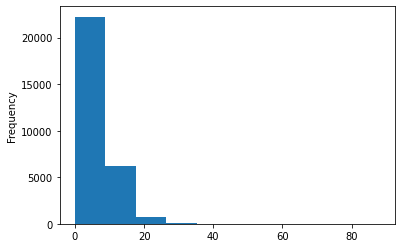

In [91]:
country_freq_count = country_freq_df["country_count"]
print("Mean: " + str(np.mean(country_freq_count)))
country_freq_count.plot.hist()

##### Should I filter out the cases where count is zero as misclassification?
- mean might be skewed 
- probably shouldn't be working with count, which doesn't consider different article length

Mean: 0.8907813140309835


<AxesSubplot:ylabel='Frequency'>

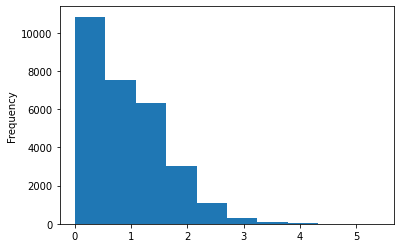

In [92]:
country_freq_freq = country_freq_df["country_freq"]
print("Mean: " + str(np.mean(country_freq_freq)))
country_freq_freq.plot.hist()

##### Should I filter out stop words in between so that the percentage values are not as low?
- since articles are modern text and in english, maybe can use nltk libraries => TODO
- In general, what should the frequency be in relation to? 
- What does it take for it to decide topic? 
- Maybe also should do something related to lemmatizations since the hardcoding approach of the dictionary doesn't consider "russian" for russia in the current frequency calculation process
- not sure if any of these thoughts are on the right track?

## Country Frequency in Quote

In [114]:
#test 
print(country_count_in_text(merged_df["QText"][0], "Iran"))
print(country_freq_in_text(merged_df["QText"][0], "Iran"))

0
0.0


In [115]:
country_freq_in_quote = merged_df[["Quote ID", "Messages", "QText"]].groupby("Quote ID").agg(max)
country_freq_in_quote

,Messages,QText
Quote ID,,
7406204,Iran,reports of major damage to the Bushehr plant w...
7612425,Iran,"""There really are only two alternatives here: ..."
7630112,Iran,'this deal is most likely to send political jo...
7630113,Iran,"""Iran does have enough politico-military and e..."
7630114,Iran,"With this deal, Saudi by necessity will reach ..."
...,...,...
82162168,China,"that the construction of the silo fields ""like..."
82162169,China,"that the Chinese ""are blasting past that defin..."
82162170,China,Rapid construction at three suspected silo fie...


In [116]:
country_freq_in_quote["country_count"] = country_freq_in_quote.apply(lambda x: country_count_in_text(x["QText"], x["Messages"]), axis=1)
country_freq_in_quote.head()

,Messages,QText,country_count
Quote ID,,,
7406204,Iran,reports of major damage to the Bushehr plant w...,0
7612425,Iran,"""There really are only two alternatives here: ...",1
7630112,Iran,'this deal is most likely to send political jo...,0
7630113,Iran,"""Iran does have enough politico-military and e...",0
7630114,Iran,"With this deal, Saudi by necessity will reach ...",0


In [117]:
country_freq_in_quote["country_freq"] = country_freq_in_quote.apply(lambda x: country_freq_in_text(x["QText"], x["Messages"]), axis=1)
country_freq_in_quote.head()

,Messages,QText,country_count,country_freq
Quote ID,,,,
7406204,Iran,reports of major damage to the Bushehr plant w...,0,0.000000
7612425,Iran,"""There really are only two alternatives here: ...",1,5.555556
7630112,Iran,'this deal is most likely to send political jo...,0,0.000000
7630113,Iran,"""Iran does have enough politico-military and e...",0,0.000000
7630114,Iran,"With this deal, Saudi by necessity will reach ...",0,0.000000


In [123]:
quote_has_country = len(country_freq_in_quote[country_freq_in_quote["country_count"] > 0])
print("quotes count with country:" + str(quote_has_country))
quotes = len(country_freq_in_quote)
print("quotes count:" + str(quotes))
proportions = quote_has_country / quotes
print("proportion of quotes with country in the quote:" + str(proportions))

quotes count with country:50574
quotes count:170181
proportion of quotes with country in the quote:0.2971777107902762


Thoughts
- Having the country/ the frequency of the country in a quote is probably not the best indicator 
- Since from this dataset, we can see that there aren't many quotes with countries inside
- this makes intuitive sense similar to the headlines, 
- thus, probably better to analyze the fulltext compared to the quote itself for country topics

## Country in surrounding text of the quote

- have not figured out a efficient way to locate the position of the quote inside the full text
- probably need to think more about how to look around the quote

# Next Steps

1) More analysis for country frequency in full text
    - lemmatization or dictionary approach for variations of the country name
    - filter out step words for better grasps of frequency 
2) Look more at country in surrounding text of the quote
3) Headlines and country in quote can still be features if it's more clean